# Обычная модель линейной регрессии

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv #вычисление обратной матрицы
from sklearn.metrics import mean_absolute_error #поиск средней ошибки в абсолютном и квадратичном смысле

data = pd.read_csv("classes.csv")

Выделение нужных характеристик и формирование таблицы количества уникальных преподавателей в каждом месяце

In [3]:
data['start_at']= pd.to_datetime(data['start_at']) 
#data.sort_values(by = "start_at", inplace = True)
data['year'] = data['start_at'].dt.year
data['month'] = data['start_at'].dt.month
Y_true = data.groupby(['year', 'month'])['teacher_id'].nunique()
Y_true.index = range(25)

Уравнение линейной регрессии для $n$ наблюдений:
$$Y_i = a_0+k*t_i$$
$t$ -  независимой переменная (месяц) 

$Y$ – зависимая переменная, которую будем предсказывать (количество преподавателей)

$a$ – свободный член - значение Y в начальный момент времени t = 0

$k$ – градиент оценённой линии; представляет собой величину, на которую Y увеличивается в среднем, если увеличивать $t$ на одну единиц

В матричной форме для нескольких наблюдений:

$$Y = A*\theta,$$
где $Y$ - вектор наблюдений; $A$ - матрица (n x 2), первый столбец - единичный, второй - значения параметра t; 
$\theta = (a_0, k)$

In [4]:
Y = np.matrix(Y_true).T
Y_train = Y[:-1]
A = np.matrix(np.concatenate((np.ones(shape = (Y_true.size-1, 1), dtype = int), np.arange(0,Y_true.size-1).reshape(Y_true.size-1,1)), axis=1))
#один месяц отрезаем для проверки

Оценим вектор параметров по методу наименьших квадратов:

$$\hat{\theta}: (Y - A*\theta)^2 \rightarrow min$$

$$\hat{\theta} = argmin(Y - A*\theta)^2 = (A^{T}A)^{-1}A^{T}Y$$

In [5]:
tetta = np.dot(np.dot(inv(np.dot(A.T,A)),A.T), Y_train)
a0 = float(tetta[0,0])
k = float(tetta[1,0])
print("Оценки параметров: a = {0}, k = {1} ".format(a0, k))

Оценки параметров: a = 810.0966666666673, k = 295.18000000000006 


Теперь можно построить график полученной функции на плоскости с реальными значениями

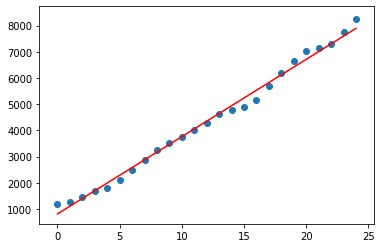

In [6]:
x = np.linspace(0, Y_train.size,Y_train.size + 1)
Y_pred = a0 + x * k

plt.plot(x, Y_pred, '-r')
plt.scatter(Y_true.index, Y_true)
plt.show()

Посмотрим на ошибку между реальным количеством учителей на 25 месяце (которого не было в исходной моделе) и предсказанным моделью и оценим ошибку в общем

In [15]:
print("Ошибка на 25-ом месяце: ", a0 + Y_train.size * k - Y_true[Y_train.size])

Ошибка на 25-ом месяце:  -357.5833333333312


In [7]:
print("Предсказанное количество требуемых преподавателей в следующем месяце:\n", a0 + 25 * k)

Предсказанное количество требуемых преподавателей в следующем месяце:
 8189.596666666669


### Оценка точности модели

In [17]:
print("Средняя абсолютная ошибка за последние пять месяцев: ", mean_absolute_error(Y_true[20:25], Y_pred[20:25]))

Средняя абсолютная ошибка за последние пять месяцев:  198.16599999999872
